In [1]:
import numpy as np
import matplotlib.pyplot as plt
#supressing the scientific output
np.set_printoptions(suppress=True)

In [2]:
data = np.loadtxt("sample.txt",dtype=np.float64,delimiter=",")
data[:5,::] #dataset loaded demonstration

array([[   2110.,       3.,       2., 6541000.],
       [    982.,       1.,       1., 3044200.],
       [   2556.,       4.,       2., 7923600.],
       [   1461.,       2.,       3., 4529100.],
       [    995.,       1.,       1., 3084500.]])

In [3]:
X = data[::,0:3]
Y = data[::,-1:]

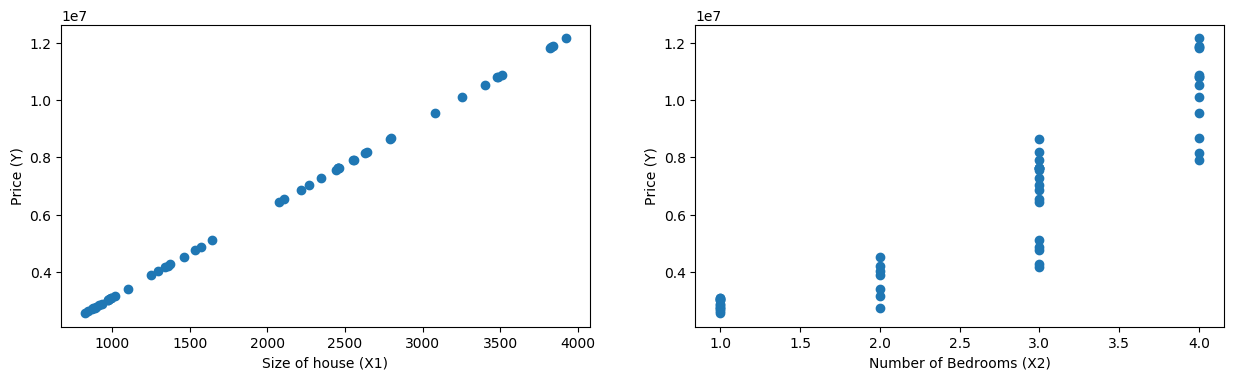

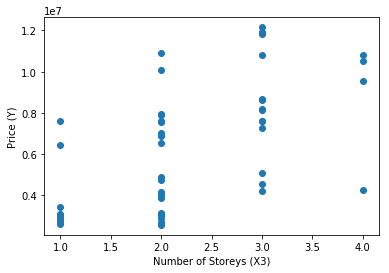

In [5]:
# Plotting example dataset
plt.figure(figsize = (15,4),dpi=100)
plt.subplot(121)
plt.scatter(X[::,0:1],Y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")
plt.subplot(122)
plt.scatter(X[::,1:2],Y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")
plt.show()
plt.scatter(X[::,-1:],Y)
plt.xlabel("Number of Storeys (X3)")
plt.ylabel("Price (Y)")
plt.show()

In [6]:
# introduce weights of hypothesis (randomly initialize)
Theta = np.random.rand(1,4)
# m is total example set , n is number of features
m,n = X.shape
# add bias to input matrix by simple make X0 = 1 for all
X_bias = np.ones((m,n+1))
X_bias[::,1:] = X
# output first 5 X_bias examples
print ("X_bias = \n",X_bias[0:5,:])
print ("Y = \n",Y[0:5,::])

X_bias = 
 [[   1. 2110.    3.    2.]
 [   1.  982.    1.    1.]
 [   1. 2556.    4.    2.]
 [   1. 1461.    2.    3.]
 [   1.  995.    1.    1.]]
Y = 
 [[6541000.]
 [3044200.]
 [7923600.]
 [4529100.]
 [3084500.]]


In [7]:
#feature scaling
# it also protect program from overflow error
mean_size = np.mean(X_bias[::,1:2])
mean_bedroom = np.mean(X_bias[::,2:3])
mean_storey = np.mean(X_bias[::,3:])
size_std = np.std(X_bias[::,1:2])
bedroom_std = np.std(X_bias[::,2:3])
storey_std = np.std(X_bias[::,3:])
X_bias[::,1:2] = (X_bias[::,1:2] - mean_size)/ (size_std) 
X_bias[::,2:3] = (X_bias[::,2:3] - mean_bedroom)/ (bedroom_std)
X_bias[::,3:] = (X_bias[::,3:] - mean_storey)/ (storey_std)
X_bias[0:5,::]

array([[ 1.        ,  0.07410264,  0.3245483 , -0.27132938],
       [ 1.        , -1.06469537, -1.47849781, -1.40186846],
       [ 1.        ,  0.52437206,  1.22607136, -0.27132938],
       [ 1.        , -0.58111005, -0.57697476,  0.8592097 ],
       [ 1.        , -1.05157093, -1.47849781, -1.40186846]])

In [8]:
#define function to find cost
def cost(X_bias,Y,Theta):
    np.seterr(over='raise')
    m,n = X.shape
    hypothesis = X_bias.dot(Theta.transpose())
    return (1/(2.0*m))*((np.square(hypothesis-Y)).sum(axis=0))

In [9]:
#function gradient descent algorithm from minimizing theta
def gradientDescent(X_bias,Y,Theta,iterations,alpha):
    count = 1
    cost_log = np.array([])
    while(count <= iterations):
        hypothesis = X_bias.dot(Theta.transpose())
        temp0 = Theta[0,0] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,0:1])).sum(axis=0)
        temp1 = Theta[0,1] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,1:2])).sum(axis=0)
        temp2 = Theta[0,2] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,2:3])).sum(axis=0)
        temp3 = Theta[0,3] - alpha*(1.0/m)*((hypothesis-Y)*(X_bias[::,-1:])).sum(axis=0)
        Theta[0,0] = temp0
        Theta[0,1] = temp1
        Theta[0,2] = temp2
        Theta[0,3] = temp3
        cost_log = np.append(cost_log,cost(X_bias,Y,Theta))
        count = count + 1
    plt.plot(np.linspace(1,iterations,iterations,endpoint=True),cost_log)
    plt.title("Iteration vs Cost graph ")
    plt.xlabel("Number of iteration")
    plt.ylabel("Cost of Theta")
    plt.show()
    return Theta

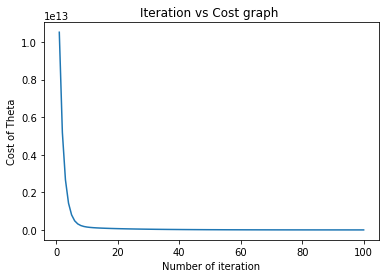

[[6313460.         2987830.95202173   86265.92501802   -5061.62059016]]


In [10]:
alpha = 0.3
iterations = 100
Theta = gradientDescent(X_bias,Y,Theta,iterations,alpha)
print(Theta)

In [11]:
# predict the price of a house with 1650 square feet and 3 bedrooms
# add bias unit 1.0
X_predict = np.array([1.0,2000.0,3,2]) 
#feature scaling the data first
X_predict[1] = (X_predict[1] - mean_size)/ (size_std) 
X_predict[2] = (X_predict[2] - mean_bedroom)/ (bedroom_std)
X_predict[3] = (X_predict[3] - mean_storey)/ (storey_std)
hypothesis = X_predict.dot(Theta.transpose())
print("Cost of house with 1650 sq ft and 3 bedroom is ",hypothesis)

Cost of house with 1650 sq ft and 3 bedroom is  [6232429.3938604]
